In [ ]:
#https://github.com/gsampath127/predicting-churn-for-bank-customers/blob/master/EDA_FeatureEngineering.ipynb

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,LabelBinarizer,OneHotEncoder

# Feature Engineering

In [3]:
path="/Users/KumarSanjeev/Desktop/Training Data/Churn_Modelling.csv"

In [4]:
data= pd.read_csv(path)

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
data.drop(columns=["CustomerId","Surname"],axis=1)

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
numericColumns = ['CreditScore' , 'Age', 'Tenure', 'Balance',  'EstimatedSalary']
categoryColumns = ['Geography', 'Gender','NumOfProducts', 'HasCrCard', 'IsActiveMember']

/Users/kumarsanjeev/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/kumarsanjeev/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/Users/kumarsanjeev/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/Users/kumarsanjeev/anaconda3/lib/python3.6/site-packages/seaborn

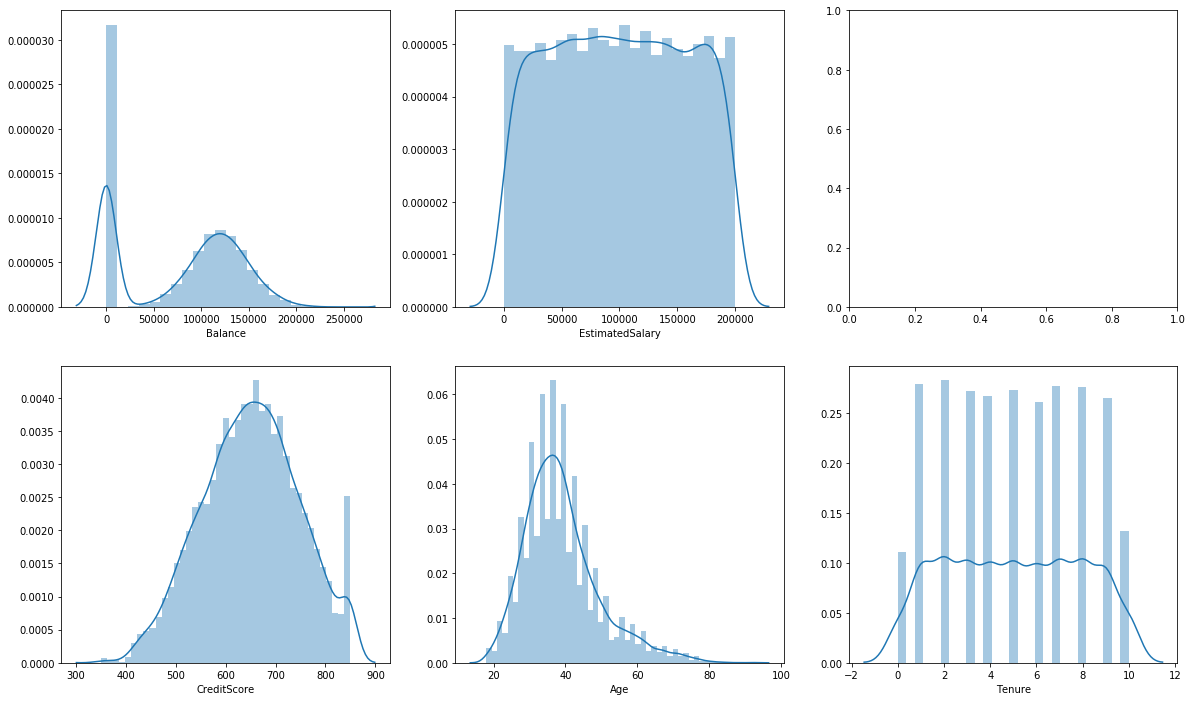

In [26]:
# histogram for numeric columns
#df[numericColumns].hist()

fig,axarr = plt.subplots(2,3,figsize=(20,12))

i=0
for col in numericColumns:
    if(i>2):
        sns.distplot(data[col],ax=axarr[0][i-3])
    else:
        sns.distplot(data[col],ax=axarr[1][i])
    i = i+1

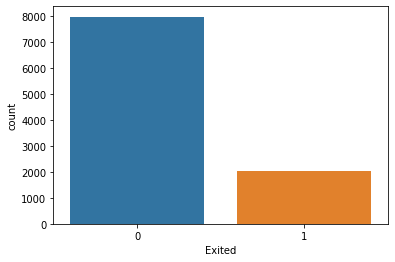

In [32]:
sns.countplot(data["Exited"])

# distribution of Exited column


# Co relation of Numeric Variables

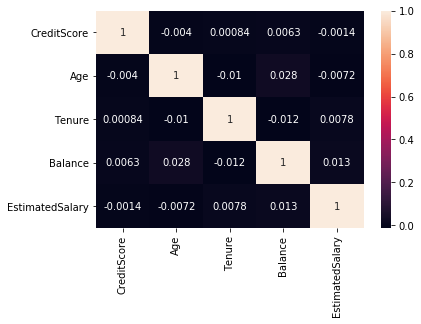

In [35]:
sns.heatmap(data[numericColumns].corr(),annot=True,linecolor="Red")

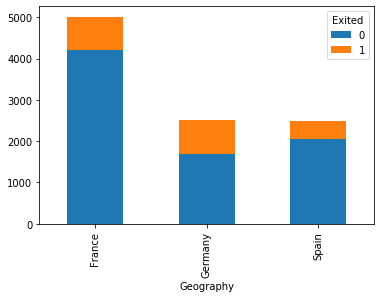

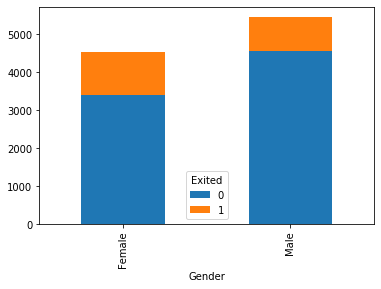

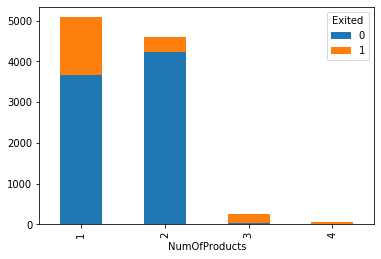

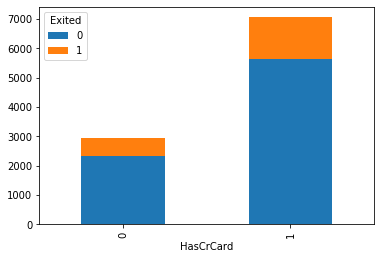

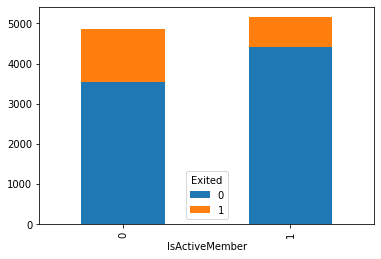

In [38]:
for col in categoryColumns:
    pivot = pd.crosstab(data[col],data.Exited)
    pivot.plot.bar(stacked=True)

In [ ]:
Feature_Engineering

# Feature_Engineering

In [39]:
path="/Users/KumarSanjeev/Desktop/Training Data/Feature_Engineering.csv"

In [40]:
data=pd.read_csv(path)
data.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,-0.326205,France,Female,0.293503,0.2,-1.225786,1,1,1,0.506735,1
1,2,-0.440014,Spain,Female,0.198154,0.1,0.117344,1,0,1,0.562709,0
2,3,-1.536717,France,Female,0.293503,0.8,1.332987,3,1,0,0.569654,1
3,4,0.501496,France,Female,0.007456,0.1,-1.225786,2,0,0,0.469120,0
4,5,2.063781,Spain,Female,0.388852,0.2,0.785689,1,1,1,0.395400,0


In [41]:
numericColumns = ['CreditScore' , 'Age', 'Tenure', 'Balance',  'EstimatedSalary']
categoryColumns = ['Geography', 'Gender','NumOfProducts', 'HasCrCard', 'IsActiveMember']

In [44]:
from sklearn.feature_selection import VarianceThreshold
const_numeric = VarianceThreshold(threshold=0)
const_numeric.fit(data[numericColumns])

VarianceThreshold(threshold=0)

In [45]:
const_numeric.variances_

array([0.9999    , 0.9999    , 0.08363836, 0.9999    , 0.08269394])

# Using Co-relation

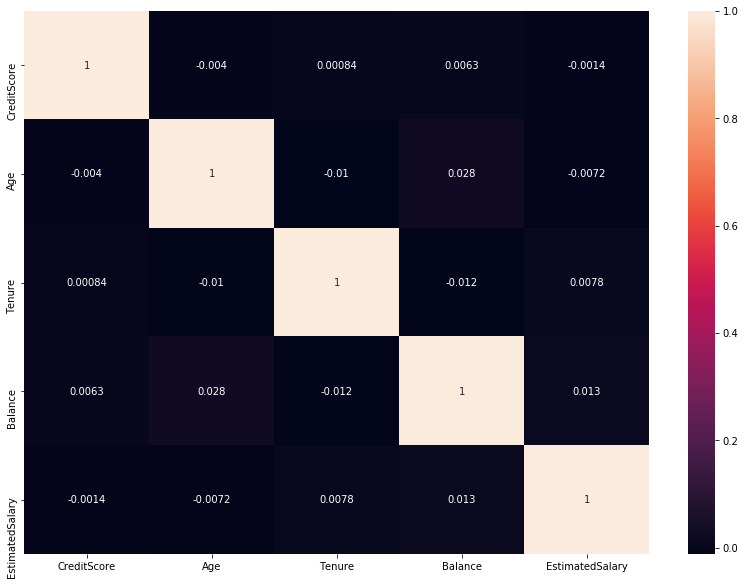

In [58]:
df_corr= data[numericColumns].corr()
plt.figure(figsize=(14,10))
sns.heatmap(df_corr,annot=True)

In [61]:
df_corr

,CreditScore,Age,Tenure,Balance,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,0.012797
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,1.000000


In [59]:
def get_correlation_features(threshold):
    correlated_features = set()
    for i in range(len(df_corr.columns)):
        for j in range(i):
            if(abs(df_corr.iloc[i,j])>threshold):
                corr_column = df_corr.columns[i]
                correlated_features.add(corr_column)
    return correlated_features

In [60]:
corr_features = get_correlation_features(0.01)
list(corr_features)

['EstimatedSalary', 'Balance']